In [600]:
#Dependencies
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
#Read given data
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
metadata = pd.read_csv(mouse_metadata_path)
results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
core0 = pd.merge(metadata, results, on="Mouse ID", how="left")
core0

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [601]:
# Checking the number of mice in the DataFrame.
mice = core0["Mouse ID"].nunique()
mice

249

In [602]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = results["Mouse ID"].value_counts()
duplicate

g989    13
o562    10
k862    10
j365    10
m601    10
        ..
o848     1
h428     1
d133     1
n482     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [603]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = results.loc[results["Mouse ID"]=="g989",:]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [604]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
metadata1 = metadata.loc[metadata["Mouse ID"] != "g989", :]
results1 = results.loc[results["Mouse ID"] != "g989", :]
core1 = pd.merge(metadata1, results1, on="Mouse ID", how="left")
core1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [605]:
# Checking the number of mice in the clean DataFrame.
core1["Mouse ID"].nunique()

248

In [606]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = core1.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = core1.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = core1.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdv = core1.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
error = core1.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
statistics = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Standard Deviation": stdv, "Standard Error of the Mean": error})
#Formatting
statistics["Mean"] = statistics["Mean"].map("{:,.2f}".format)
statistics["Median"] = statistics["Median"].map("{:,.2f}".format)
statistics["Variance"] = statistics["Variance"].map("{:,.2f}".format)
statistics["Standard Deviation"] = statistics["Standard Deviation"].map("{:,.2f}".format)
statistics["Standard Error of the Mean"] = statistics["Standard Error of the Mean"].map("{:,.2f}".format)
#Displaying
statistics

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


<IPython.core.display.Javascript object>


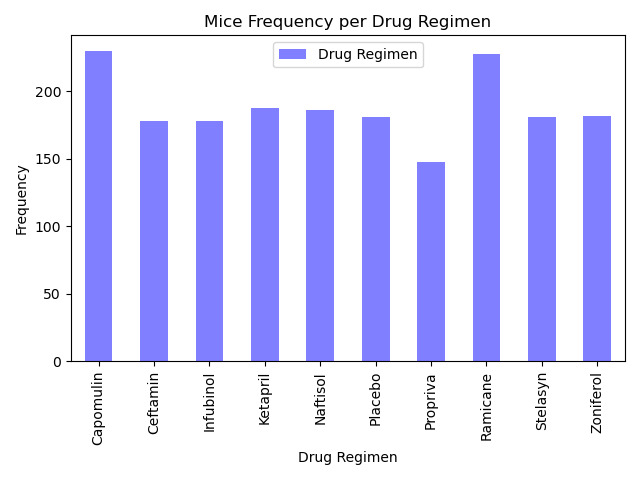

In [607]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
drug0 = core1.groupby("Drug Regimen")
drug1 = pd.DataFrame(drug0["Drug Regimen"].count())
bar = drug1.plot(kind="bar",title="Mice Frequency per Drug Regimen",color="blue",alpha=0.5,align="center")
bar.set_xlabel("Drug Regimen")
bar.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


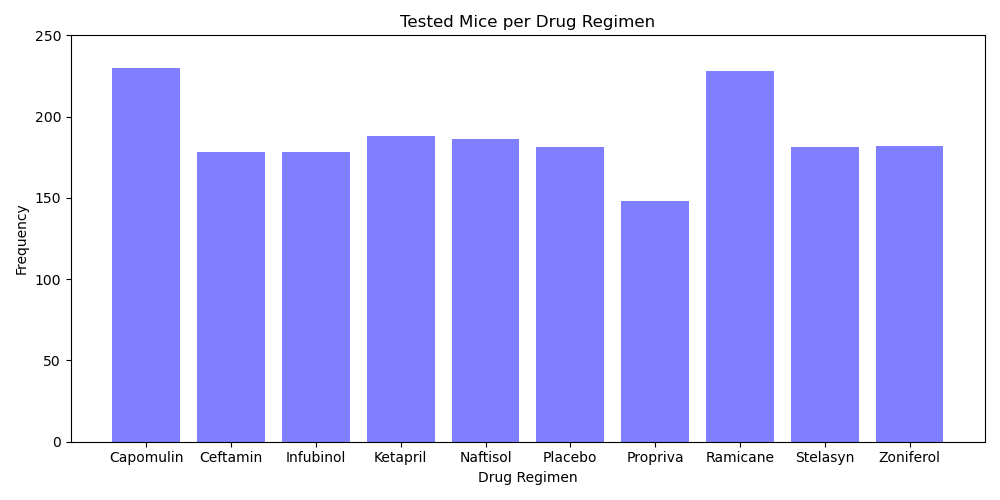

In [608]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplo
x_axis = np.arange(len(drug1))
ticks = [value for value in x_axis]
frequency = core1["Drug Regimen"].value_counts()
plt.figure(figsize=(10,5))
plt.bar(x_axis, drug1["Drug Regimen"], color = "blue", alpha = 0.5, align = "center")
plt.xticks(ticks, list(drug1.index))
plt.ylim(0,max(frequency)+20)
plt.title("Tested Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [609]:
# Gender DataFrame
genders0 = pd.DataFrame(core1.groupby(["Sex"]).count()).reset_index()
genders0 = genders0[["Sex","Mouse ID"]]
genders0 = genders0.rename(columns={"Mouse ID":"Frequency"})
genders0

,Sex,Frequency
0,Female,922
1,Male,958


<IPython.core.display.Javascript object>


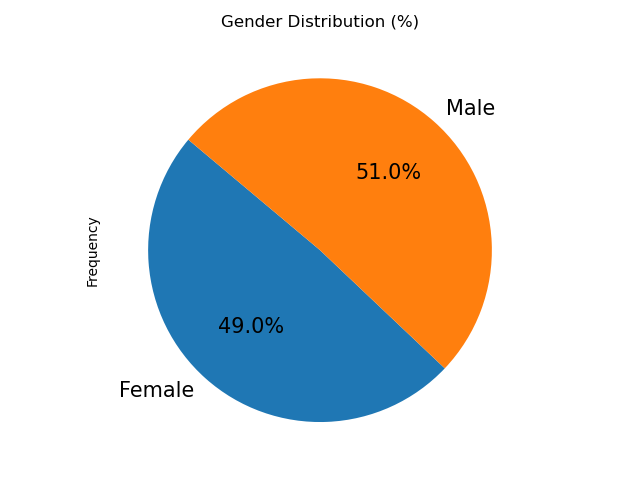

In [610]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders0.plot(kind="pie", y="Frequency",title = "Gender Distribution (%)", autopct = "%1.1f%%", startangle = 140, shadow = False,
              labels = genders0["Sex"], legend = False, fontsize = 15)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


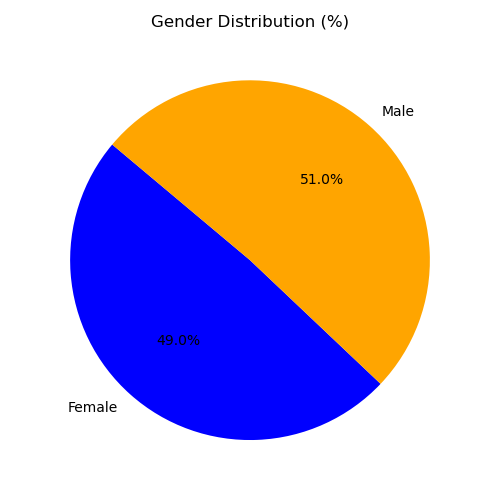

In [611]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
males = genders0["Frequency"].values[0]
females = genders0["Frequency"].values[1]
genderlist = [males,females]
plt.figure(figsize=(5,5))
plt.pie(genderlist, explode=(0.0,0), labels = labels, colors = ["blue","orange"],autopct="%1.1f%%", shadow=False,startangle = 140)
plt.title("Gender Distribution (%)")
plt.tight_layout()
plt.show()

In [612]:
#Obtaining the most promising drug regimens
statistics.sort_values(by=['Mean'], inplace=True)
statistics.reset_index()
promising0 = statistics["Mean"]
promising0 = promising0.reset_index().head(4)
promising0

,Drug Regimen,Mean
0,Ramicane,40.22
1,Capomulin,40.68
2,Propriva,52.32
3,Ceftamin,52.59


In [613]:
promising1 = list(promising0["Drug Regimen"])
promising1

['Ramicane', 'Capomulin', 'Propriva', 'Ceftamin']

In [614]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
ramicane0 = core1.loc[core1["Drug Regimen"] == "Ramicane" ,:]
capomulin0 = core1.loc[core1["Drug Regimen"] == "Capomulin" ,:]
propriva0 = core1.loc[core1["Drug Regimen"] == "Propriva" ,:]
ceftamin0 = core1.loc[core1["Drug Regimen"] == "Ceftamin" ,:]
ramicane1 = ramicane0.groupby("Mouse ID").max()["Timepoint"]
capomulin1 = capomulin0.groupby("Mouse ID").max()["Timepoint"]
propriva1 = propriva0.groupby("Mouse ID").max()["Timepoint"]
ceftamin1 = ceftamin0.groupby("Mouse ID").max()["Timepoint"]
ramicane2 = pd.DataFrame(ramicane1)
capomulin2 = pd.DataFrame(capomulin1)
propriva2 = pd.DataFrame(propriva1)
ceftamin2 = pd.DataFrame(ceftamin1)
ramicane3 = pd.merge(ramicane2,core1, on=("Mouse ID","Timepoint"), how="left")
capomulin3 = pd.merge(capomulin2,core1, on=("Mouse ID","Timepoint"), how="left")
propriva3 = pd.merge(propriva2,core1,on=("Mouse ID","Timepoint"), how="left")
ceftamin3 = pd.merge(ceftamin2,core1,on=("Mouse ID","Timepoint"), how="left")

In [615]:
#Ramicane
ramicane3

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [616]:
#Capomulin
capomulin3

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [617]:
#Propriva
propriva3

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a699,45,Propriva,Female,5,28,62.191414,1
1,c927,40,Propriva,Female,4,26,64.183229,4
2,g558,40,Propriva,Male,8,29,61.774963,4
3,g570,45,Propriva,Male,16,29,70.492788,2
4,i635,45,Propriva,Male,21,26,58.633404,3
5,k603,20,Propriva,Male,2,27,50.180109,0
6,l215,10,Propriva,Male,10,29,53.653970,1
7,n482,0,Propriva,Female,4,29,45.000000,0
8,n630,5,Propriva,Female,15,29,46.099100,0
9,n678,10,Propriva,Male,5,29,49.145709,1


In [618]:
#Ceftamin
ceftamin3

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [619]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.
ramicane4 = ramicane3["Tumor Volume (mm3)"]
capomulin4 = capomulin3["Tumor Volume (mm3)"]
propriva4 = propriva3["Tumor Volume (mm3)"]
ceftamin4 = ceftamin3["Tumor Volume (mm3)"]
ramicane5 = ramicane4.quantile([0.25,0.50,0.75])
capomulin5 = capomulin4.quantile([0.25,0.50,0.75])
propriva5 = propriva4.quantile([0.25,0.50,0.75])
ceftamin5 = ceftamin4.quantile([0.25,0.50,0.75])
lowerramicane = ramicane5[0.25]
lowercapomulin = capomulin5[0.25]
lowerpropriva = propriva5[0.25]
lowerceftamin = ceftamin5[0.25]
upperramicane = ramicane5[0.75]
uppercapomulin = capomulin5[0.75]
upperpropriva = propriva5[0.75]
upperceftamin = ceftamin5[0.75]
iqrramicane = upperramicane - lowerramicane
iqrcapomulin = uppercapomulin - lowercapomulin
iqrpropriva = upperpropriva - lowerpropriva
iqrceftamin = upperceftamin - lowerceftamin
outlierramicane1 = lowerramicane - (1.5*iqrramicane)
outlierramicane2 = upperramicane + (1.5*iqrramicane)
outliercapomulin1 = lowercapomulin - (1.5*iqrcapomulin)
outliercapomulin2 = uppercapomulin + (1.5*iqrcapomulin)
outlierpropriva1 = lowerpropriva - (1.5*iqrpropriva)
outlierpropriva2 = upperpropriva + (1.5*iqrpropriva)
outlierceftamin1 = lowerceftamin - (1.5*iqrceftamin)
outlierceftamin2 = upperceftamin + (1.5*iqrceftamin)

In [620]:
#IQR & outliers: Ramicane
print(f"IQR: {iqrramicane}, potential outliers lie below and above {outlierramicane1} and {outlierramicane2} respectively.")

IQR: 9.098536719999998, potential outliers lie below and above 17.912664470000003 and 54.30681135 respectively.


In [621]:
#IQR & outliers: Capomulin
print(f"IQR: {iqrcapomulin}, potential outliers lie below and above {outliercapomulin1} and {outliercapomulin2} respectively.")

IQR: 7.781863460000004, potential outliers lie below and above 20.70456164999999 and 51.83201549 respectively.


In [622]:
#IQR & outliers: Propriva
print(f"IQR: {iqrpropriva}, potential outliers lie below and above {outlierpropriva1} and {outlierpropriva2} respectively.")

IQR: 13.569628922500002, potential outliers lie below and above 28.76529576625 and 83.04381145625001 respectively.


In [623]:
#IQR & outliers: Ceftamin
print(f"IQR: {iqrceftamin}, potential outliers lie below and above {outlierceftamin1} and {outlierceftamin2} respectively.")

IQR: 15.577752179999997, potential outliers lie below and above 25.355449580000002 and 87.66645829999999 respectively.


<IPython.core.display.Javascript object>


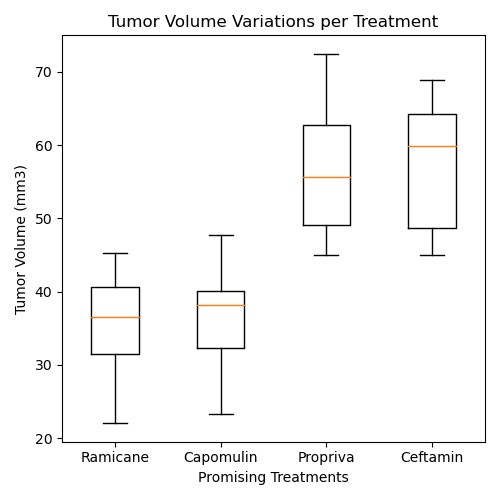

In [624]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplots = [ramicane4,capomulin4,propriva4,ceftamin4]
fig1, ax = plt.subplots(figsize=(5,5))
ax.boxplot(boxplots, labels=promising1)
ax.set_xlabel("Promising Treatments")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Volume Variations per Treatment")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


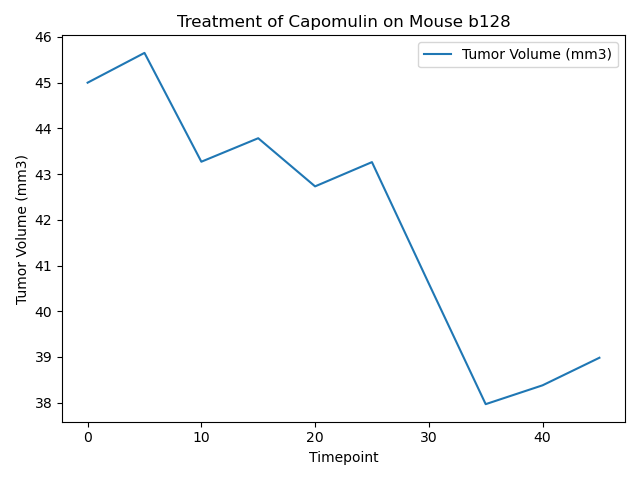

In [625]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line = capomulin0.loc[capomulin0["Mouse ID"]=="b128",:]
linechart0 = line[["Mouse ID","Timepoint","Tumor Volume (mm3)"]].set_index("Timepoint")
linechart1 = linechart0.plot.line()
plt.title("Treatment of Capomulin on Mouse b128")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


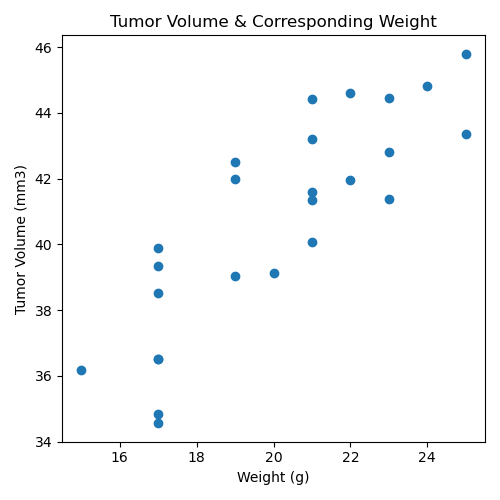

In [626]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.figure(figsize=(5,5))
scatterplot0 = capomulin0.groupby(["Mouse ID"]).mean()
plt.scatter(scatterplot0["Weight (g)"],scatterplot0["Tumor Volume (mm3)"])
plt.title("Tumor Volume & Corresponding Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

In [627]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatterplot0["Weight (g)"],scatterplot0["Tumor Volume (mm3)"])[0]
correlation

0.8419363424694717

<IPython.core.display.Javascript object>


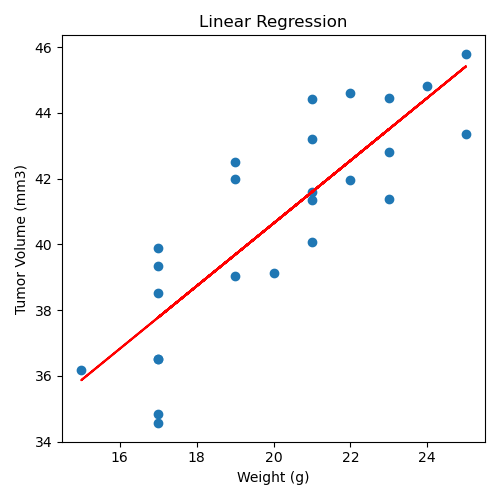

In [630]:
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html
x = scatterplot0["Weight (g)"]
y = scatterplot0["Tumor Volume (mm3)"]
slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
regression = x*slope + intercept
equation = "y = " + str(slope) + str(intercept)
plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.plot(x,regression,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Linear Regression")
plt.tight_layout()
plt.show()

In [635]:
print("The least effective drugs were Ketapril and Naftisol as the yielded they highest tumor sizes at the last timestamps.")

The least effective drugs were Ketapril and Naftisol as the yielded they highest tumor sizes at the last timestamps.


In [636]:
print("The best performing drugs are Capomulin and Ramicane. With Capomuliun, we witnessed a decreate in tumor sizes of 33 percent on average during the treatment in addition to the in addition to the least number of metastatic sites. With Ramicane, we witnessed an average decrease in tumor size of approximately 26 percent by the end of the treatment.") 

The best performing drugs are Capomulin and Ramicane. With Capomuliun, we witnessed a decreate in tumor sizes of 33 percent on average during the treatment in addition to the in addition to the least number of metastatic sites. With Ramicane, we witnessed an average decrease in tumor size of approximately 26 percent by the end of the treatment.


In [641]:
print("There seems to be a significant correlation between the weight of a mouse and the tumor size as evidence by a correlation factor of approximately 0.84. Additionally, as shown by the best fit line drawn in the linear regression this trend seems to be strong assuming that the error is small or minimal.")

There seems to be a significant correlation between the weight of a mouse and the tumor size as evidence by a correlation factor of approximately 0.84. Additionally, as shown by the best fit line drawn in the linear regression this trend seems to be strong assuming that the error is small or minimal.
